# P2 submission

---

**Requirements**
P2 submission notebook should show :
- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.



**Project proposal**

Best breweries in the world 

The idea behind the identification of the best breweries is that the consumer might be more interested to try new and/or original products that come from a good brewery. This ranking is based on the ratings given by the tasters, but the ratings have to be weighted by the number of ratings for the best beers, the quality and emotions transmitted in the text following the different ratings. Some ratings might be biased or unclear so some of them might have to be filtered. Once the ranking is determined a visualisation is to be created to convey properly the attributes of the best breweries (number of “quality” beers, rankings by styles).

*Feedback*

Find and visualize the best breweries - clarity: 75 - creativity: 75 - feasibility: 75, using beer-level reviews as a proxy for brewery reviews is doable, yet will require detailed analysis. 

---

# Beer reviews EDA

This dataset consists of beer reviews from two Beer rating websites: BeerAdvocate and RateBeer, for a period of 17 years ranging from 2001 to 2017.

Metadata about users, beers, and breweries (CSV)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import os
import spacy

# Handle size of the data


TODO : add explanation of the whole process of splitting ratings.txt

In [2]:
def load_txt_file(website):
    if website == 'BeerAdvocate':
        # Specify the directory containing the text files 
        # NB : - need to be outside the repo folder !!
        #      - might need to change the path of the directory below
        directory = './../Pre-processed_data_Beer_data/BeerAdvocate/ratings_split_BA/'
    else:
        directory = './../Pre-processed_data_Beer_data/RateBeer/ratings_split_RB/'

    # Initialize an empty list to store DataFrames
    dfs = []

    # Loop through the files in reverse order (ratings-5.txt to ratings-1.txt)
    for i in range(1, 0, -1):
        file_name = f'ratings-{i}.txt'
        file_path = os.path.join(directory, file_name)

        with open(file_path, 'r') as f:
            text = f.read()

        # Remove double quotes at the beginning of each line
        data = re.sub('"', '', text)
        data = re.sub(r'^"', '', data, flags=re.MULTILINE)

        # Split the text into individual beer reviews
        beer_reviews = data.split('beer_name')

        # Extract the beer information from each review
        beer_data = []
        for review in beer_reviews:
            beer_info = {}
            for line in [entry.split(':', 1) for entry in review.split('\n') if ':' in entry]:# and 'text' not in entry]:
                if line:  # Check if the list is not empty
                    key, value = line[0].strip(), line[1].strip()
                    beer_info[key] = value
            beer_data.append(beer_info)

        # Convert the beer data into a DataFrame
        df = pd.DataFrame(beer_data)

        # Append the DataFrame to the list
        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    final_df = pd.concat(dfs, ignore_index=True)

    # Rename the columns depending on the website
    if website == 'BeerAdvocate':
        final_df.columns = [
            'beer_name',
            'beer_id',
            'brewery_name',
            'brewery_id',
            'style',
            'abv',
            'date',
            'user_name',
            'user_id',
            'appearance',
            'aroma',
            'palate',
            'taste',
            'overall',
            'rating',
            'text',
            'review'] # additional column compared to RB
    else:
        final_df.columns = [
            'beer_name',
            'beer_id',
            'brewery_name',
            'brewery_id',
            'style',
            'abv',
            'date',
            'user_name',
            'user_id',
            'appearance',
            'aroma',
            'palate',
            'taste',
            'overall',
            'rating',
            'text']
    return final_df

def sample_data(df, ratio):
    # sample the data to make it even smaller
    return df.sample(frac = ratio, random_state=42)

In [3]:
# Load data
ratings_BA = load_txt_file('BeerAdvocate')
ratings_RB = load_txt_file('RateBeer')

In [4]:
# Sample data to make it even smaller AND RANDOMIZED (not randomized in the initial txt splitting process)
ratings_BA = sample_data(ratings_BA, 1)
ratings_RB = sample_data(df = ratings_RB, ratio = 1)

In [5]:
print(len(ratings_BA))
ratings_BA.head(2)

444339


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
43736,"Hello, My Name Is Ingrid",67199,BrewDog,16315,American Double / Imperial IPA,8.2,1370426400,aztraz,aztraz.671249,nan,nan,nan,nan,nan,3.50,nan,False
273843,Solstice D'été Aux Cerises,73716,Brasserie Dieu du Ciel!,1141,Berliner Weissbier,6.5,1444644000,hopsolutely,hopsolutely.513175,4.0,4.0,3.5,4.0,3.75,3.90,Enjoying with thanks to Phyl21ca.Rarely does a...,True


In [6]:
print(len(ratings_RB))
ratings_RB.head(2)

446795


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
262500,Brew Brothers Prairie Berry Ale,21927,Brew Brothers Brewing &#40;Alberta&#41;,3033,Fruit Beer,5.5,1044615600,presario,5348,3,6,3,7,13,3.20,Big blue 1L bottle. Very loud pop announced t...
39881,Ed Hardy Premium Beer,110849,Cervecería Mexicana (Grupo Modelo),5973,Pale Lager,4.6,1281520800,Cajun,47922,2,4,2,3,5,1.60,Tasting - Gulf Brew 2010 - Pale amber white he...


### Load the other data

In [7]:
# BeerAdvocate
beers_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/beers.csv")
breweries_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/breweries.csv")
users_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/users.csv")

# RateBeer
beers_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/beers.csv")
breweries_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/breweries.csv")
users_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/users.csv")

# matched_beer_data
beers_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/beers.csv", header=1)
breweries_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/breweries.csv", header = 1)
ratings_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/ratings.csv", header=1)
users_approx = pd.read_csv("./dataset_BeerReviews/matched_beer_data/users_approx.csv", header=1)
users_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/users.csv", header=1)

## EDA

Do univariate and multivariate analysis


- formats
- distributions
- missing values
- correlations
- etc...

**Organisation of the EDA**
- General data (users, breweries)
- Numerical ratings
- Textual reviews

In [8]:
def convert_type(df, col):
    df[col] = df[col].astype('float64')
    return df

cols = ['beer_id', 'brewery_id', 'abv', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']

for col in cols : 
    ratings_BA = convert_type(ratings_BA, col)

In [9]:
def get_feature_stats(df):
    """
    Obtains descriptive statistics for all features and percentage of missing 
    values
    
    Parameters
    ----------
    df : DataFrame
         Containing all data

    Returns
    -------
    stats : DataFrame
            Containing the statistics for all features.
                   
    """
    ### BEGIN SOLUTION
    numerical = df.describe(include= ['float64', 'int64'])
    categorical = df.describe(include= ['object'])
    stats = pd.concat([numerical, categorical])
    #stats = df.describe(include= 'all') # alternative
    
    # Select the desired statistics
    stats = stats.loc[['mean', 'std', '50%', 'unique', 'top', 'freq']]
    percentage = df.isnull().sum(axis = 0)*100 / len(df)
    stats.loc['missing_values'] = np.array(percentage)
    ### END SOLUTION
    return stats

ratings_BA_stats = get_feature_stats(ratings_BA)
ratings_BA_stats

,beer_id,brewery_id,abv,appearance,aroma,palate,taste,overall,rating,beer_name,brewery_name,style,date,user_name,user_id,text,review
mean,49930.822187,7393.904217,6.283523,3.763298,3.662354,3.670929,3.713133,3.724937,3.676796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,64384.554923,10963.761690,2.314747,0.620217,0.684314,0.672210,0.703822,0.681856,0.690097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,21163.000000,853.000000,5.400000,4.000000,3.750000,3.750000,3.750000,4.000000,3.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22878,1947,104,5809,39863,39863,196394,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La Fin Du Monde,Unibroue,English Pale Ale,1498730400,Sammy,sammy.3853,nan,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10046,37472,31061,628,3833,3833,247685,254214
missing_values,0.000225,0.000450,0.000450,0.000450,0.000450,0.783636,0.000450,0.000450,0.000450,36.780926,36.780926,36.780926,36.780926,36.780926,0.00045,0.00045,0.00045


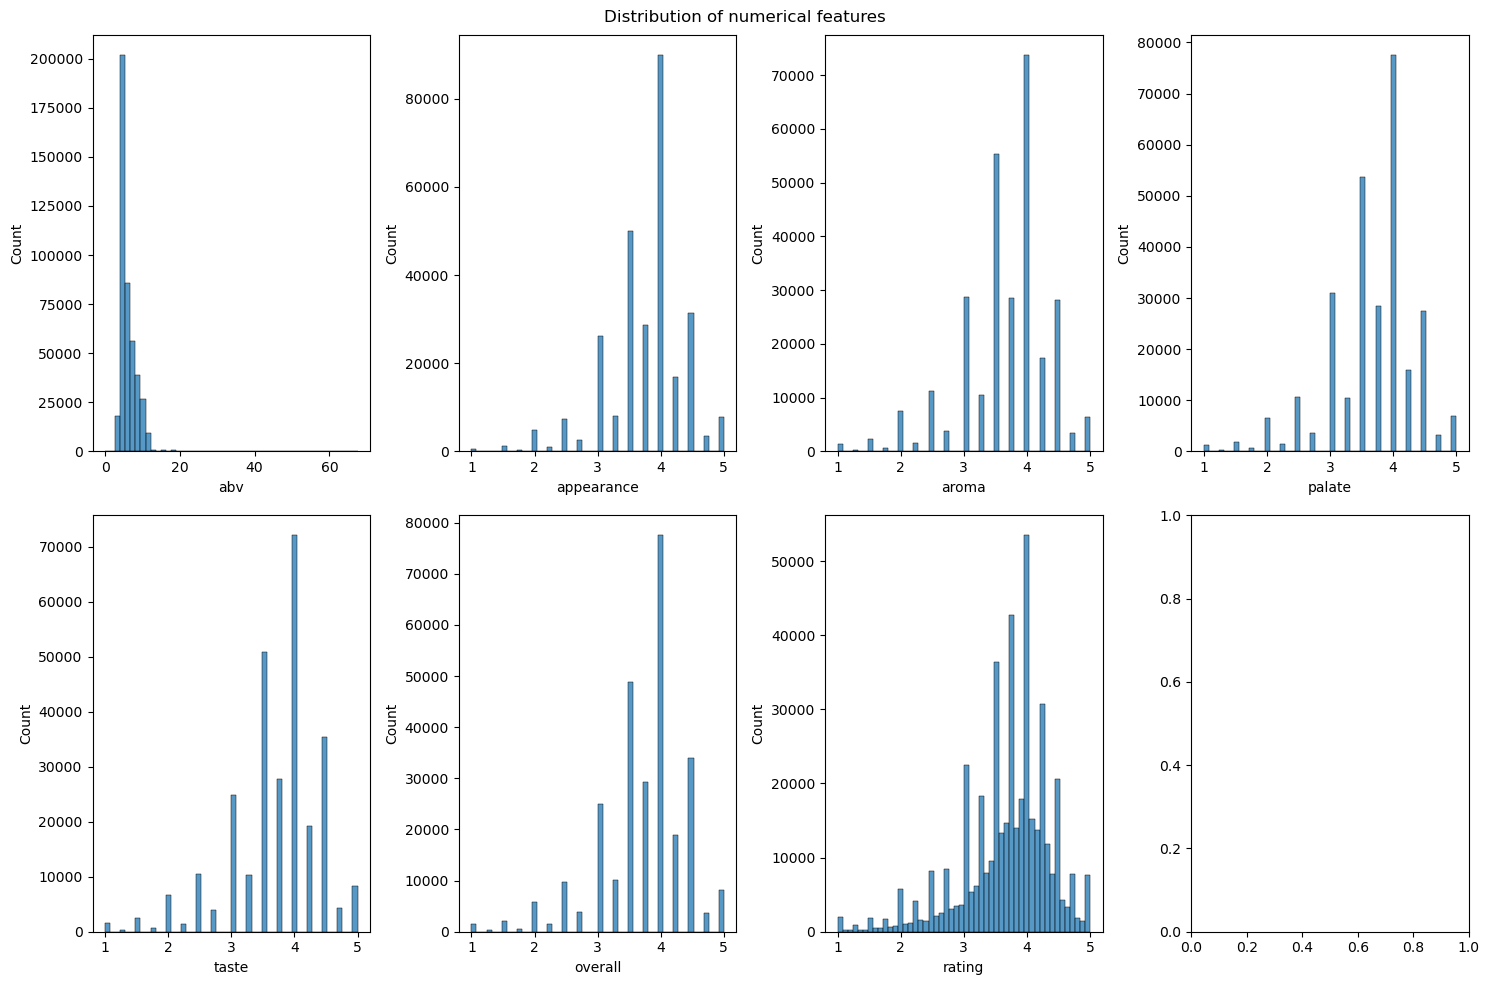

In [10]:
### 1.3
def plot_features(df, title):
    continuous_cols = ['abv', 'appearance', 'aroma', 'palate', 'taste', 'overall', 'rating'] #list(df._get_numeric_data().columns)
    fig, axes = plt.subplots(2, 4, figsize=(15,10))
    for i, col in enumerate(continuous_cols):
        ax = axes[i // 4, i % 4]
        data = df[~df[col].isna()]
        sns.histplot(data=data[col], bins=50, ax=ax) #Filter out nan values in the features
    fig.suptitle(title)
    fig.tight_layout()
    return plt
    
plot_features(ratings_BA,"Distribution of numerical features")
plt.show()


## Data preprocessing

- enrichment
- filtering
- transformation

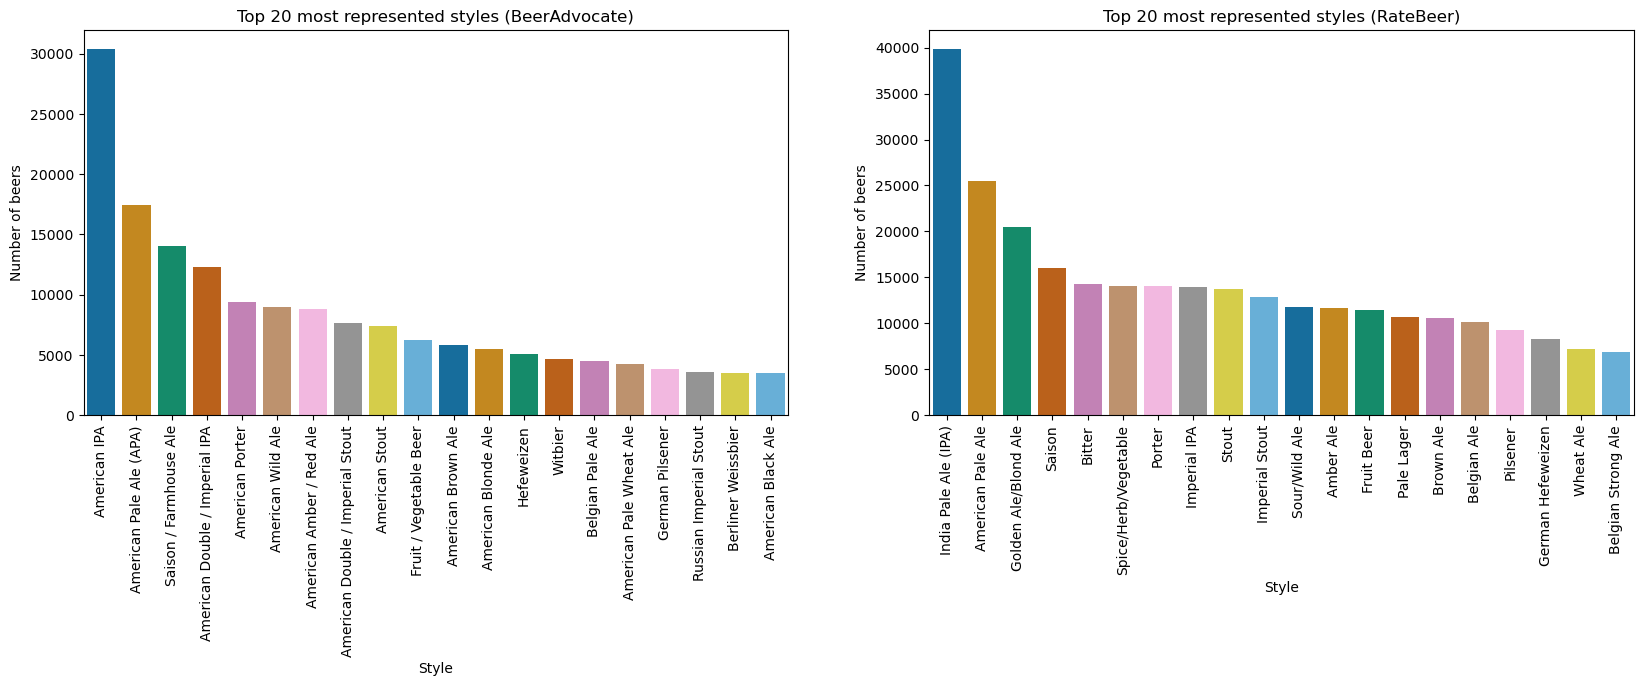

In [11]:
plt.figure(figsize=(20, 5))

# Plot barplot of Top 20 styles for BeerAdvocate
plt.subplot(1, 2, 1)
sns.barplot(x=beers_BA['style'].value_counts().head(20).index, y=beers_BA['style'].value_counts().head(20).values, palette=sns.color_palette("colorblind"))
plt.xticks(rotation=90)
plt.xlabel('Style')
plt.ylabel('Number of beers')
plt.title('Top 20 most represented styles (BeerAdvocate)')

# Plot barplot of Top 20 styles for RateBeer
plt.subplot(1, 2, 2)
sns.barplot(x=beers_RB['style'].value_counts().head(20).index, y=beers_RB['style'].value_counts().head(20).values, palette=sns.color_palette("colorblind"))
plt.xticks(rotation=90)
plt.xlabel('Style')
plt.ylabel('Number of beers')
plt.title('Top 20 most represented styles (RateBeer)')
plt.show()

#Identify the quantity of beers per style

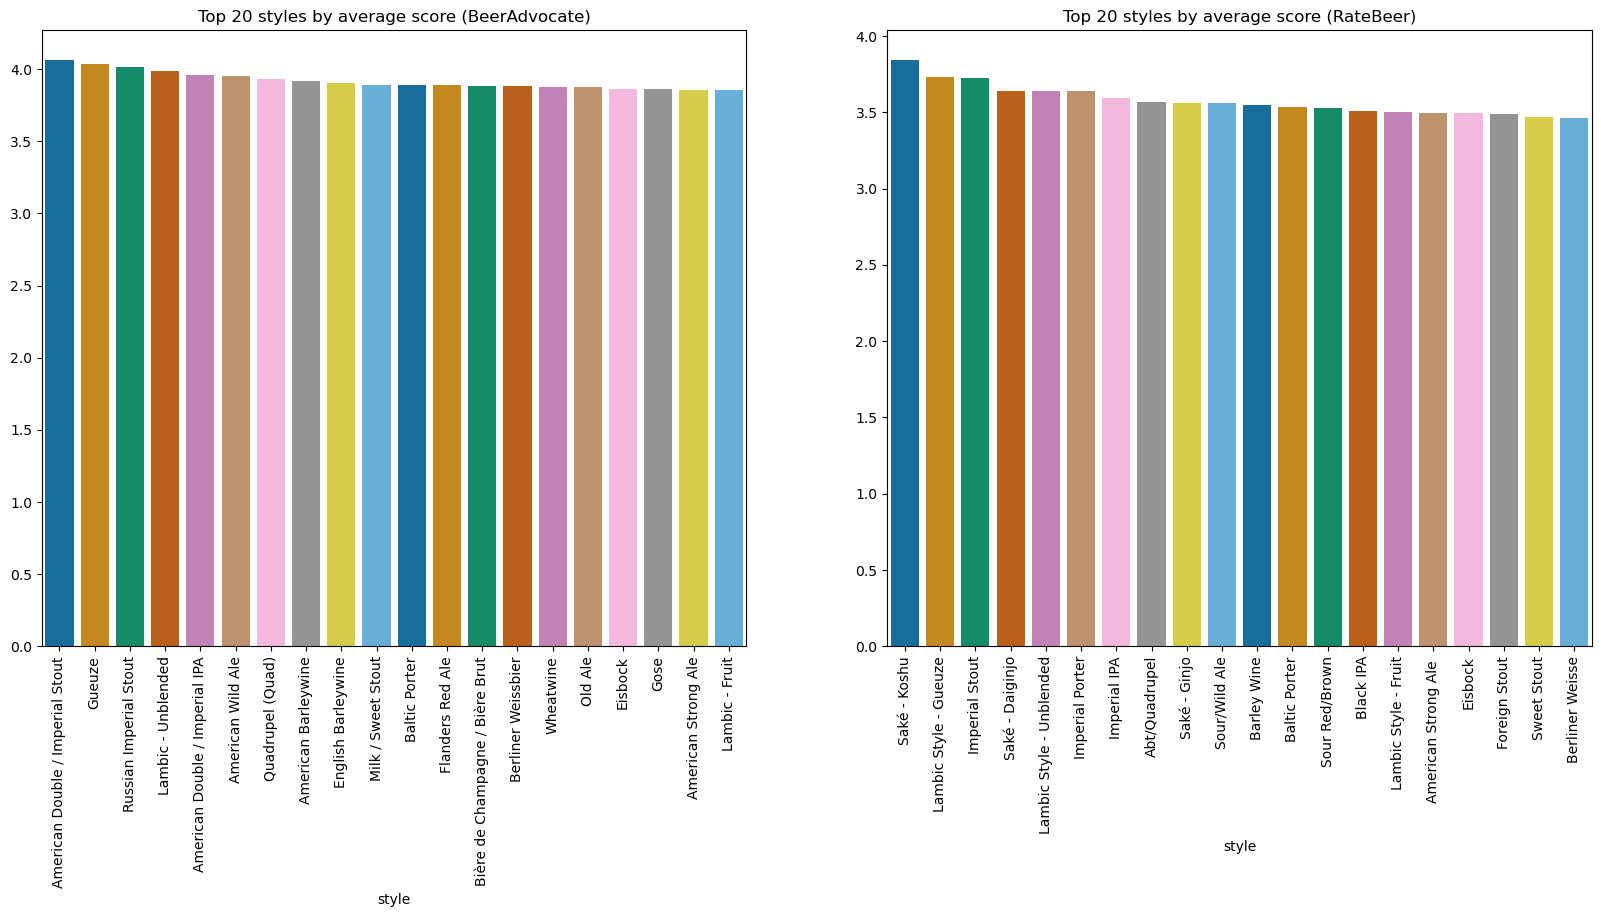

In [12]:
plt.figure(figsize=(20, 8))

# Best rated styles for BeerAdvocate
plt.subplot(1, 2, 1)
sns.barplot(x=beers_BA.groupby('style')['avg_computed'].mean().sort_values(ascending=False).head(20).index,
            y=beers_BA.groupby('style')['avg_computed'].mean().sort_values(ascending=False).head(20).values, palette=sns.color_palette("colorblind"))
plt.xticks(rotation=90)
plt.title('Top 20 styles by average score (BeerAdvocate)')

# Best rated styles for RateBeer 
plt.subplot(1, 2, 2)
sns.barplot(x=beers_RB.groupby('style')['avg_computed'].mean().sort_values(ascending=False).head(20).index,
            y=beers_RB.groupby('style')['avg_computed'].mean().sort_values(ascending=False).head(20).values, palette=sns.color_palette("colorblind"))
plt.xticks(rotation=90)
plt.title('Top 20 styles by average score (RateBeer)')

plt.show()

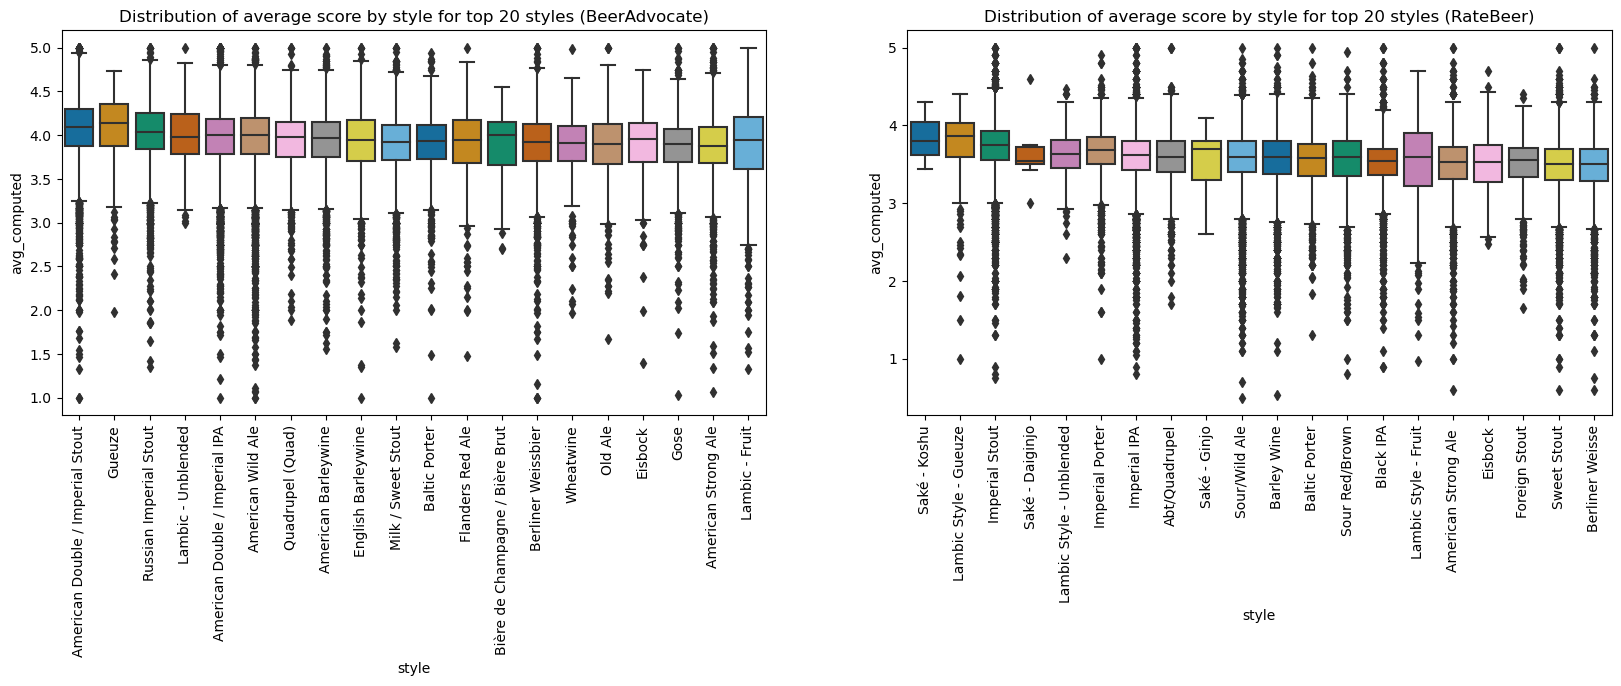

In [13]:
# Calculate the average score for each style and take the top 20 for RateBeer

def style_order_fcn(beers_df):
    style_order = beers_df.groupby('style')['avg_computed'].mean().sort_values(ascending=False).head(20).index
    return style_order

style_order_BA = style_order_fcn(beers_BA)
style_order_RB = style_order_fcn(beers_RB)

# Create the boxplots
plt.figure(figsize=(20, 5))

# Create the boxplot for BeerAdvocate
plt.subplot(1, 2, 1)
sns.boxplot(x='style', y='avg_computed', data=beers_BA[beers_BA['style'].isin(style_order_BA)], order=style_order_BA, palette=sns.color_palette("colorblind"))
plt.xticks(rotation=90)
plt.title('Distribution of average score by style for top 20 styles (BeerAdvocate)')

# Create the boxplot for RateBeer
plt.subplot(1, 2, 2)
sns.boxplot(x='style', y='avg_computed', data=beers_RB[beers_RB['style'].isin(style_order_RB)], order=style_order_RB, palette=sns.color_palette("colorblind"))
plt.xticks(rotation=90)
plt.title('Distribution of average score by style for top 20 styles (RateBeer)')

plt.show()

c:\Users\Charles\anaconda3\envs\ada\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


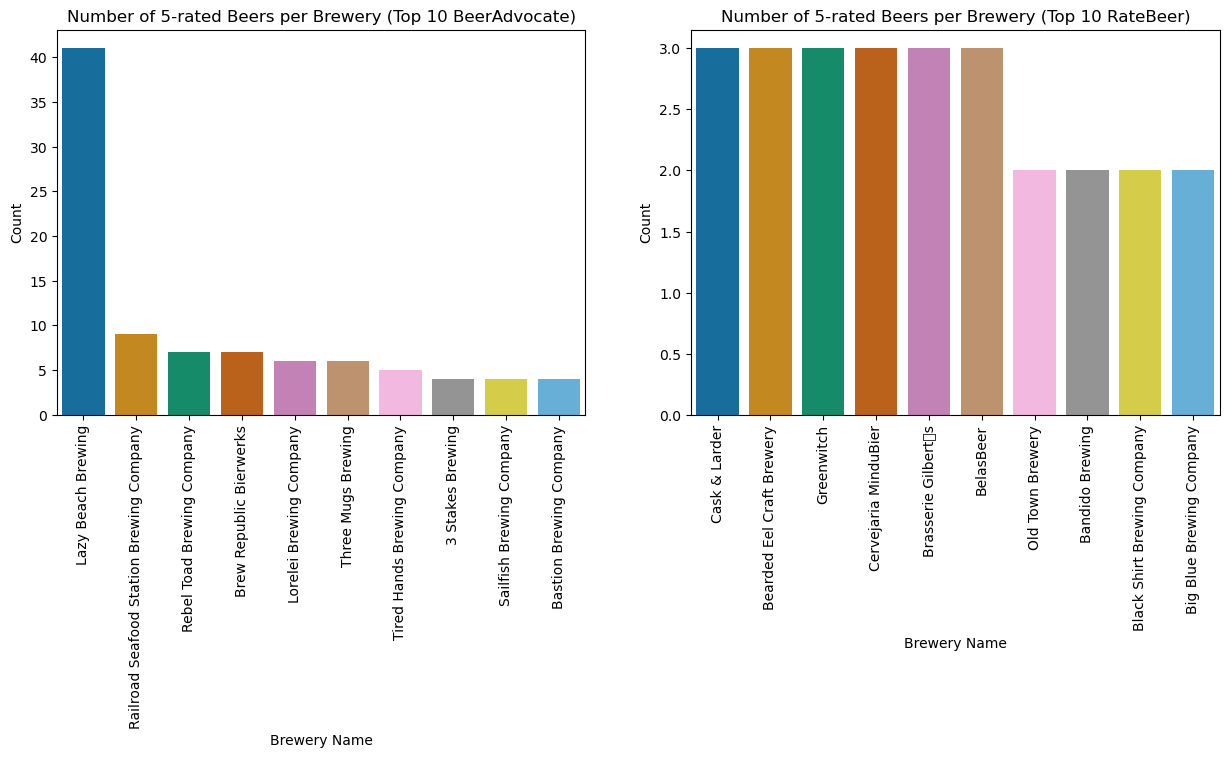

In [14]:
def top_breweries_fcn(beers_df):
    #Identify breweries with most 5 rated beers for RateBeer
    beer_score_5 = beers_df[beers_df['avg_computed'] == 5]
    # Count the occurrences of each brewery
    brewery_counts = beer_score_5['brewery_name'].value_counts().nlargest(10)

    # Create a DataFrame with the top 10 breweries and their counts
    top_breweries = pd.DataFrame({'brewery_name': brewery_counts.index, 'count': brewery_counts.values})
    return top_breweries, beer_score_5

top_breweries_BA, _ = top_breweries_fcn(beers_BA)
top_breweries_RB, _ = top_breweries_fcn(beers_RB)

_ , beer_score_5_BA = top_breweries_fcn(beers_BA)
_ , beer_score_5_RB = top_breweries_fcn(beers_RB)

# Create the barplots
plt.figure(figsize=(15, 5))

# Create a barplot for BeerAdvocate
plt.subplot(1, 2, 1)
sns.barplot(x='brewery_name', y='count', data=top_breweries_BA, palette=sns.color_palette("colorblind"))
plt.title('Number of 5-rated Beers per Brewery (Top 10 BeerAdvocate)')
plt.xlabel('Brewery Name')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Create a barplot for RateBeer
plt.subplot(1, 2, 2)
sns.barplot(x='brewery_name', y='count', data=top_breweries_RB, palette=sns.color_palette("colorblind"))
plt.title('Number of 5-rated Beers per Brewery (Top 10 RateBeer)')
plt.xlabel('Brewery Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

C:\Users\Charles\AppData\Local\Temp\ipykernel_99920\3410193634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breweries_5.rename(columns={'name': 'brewery_name'}, inplace=True)
C:\Users\Charles\AppData\Local\Temp\ipykernel_99920\3410193634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breweries_5.rename(columns={'name': 'brewery_name'}, inplace=True)
c:\Users\Charles\anaconda3\envs\ada\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


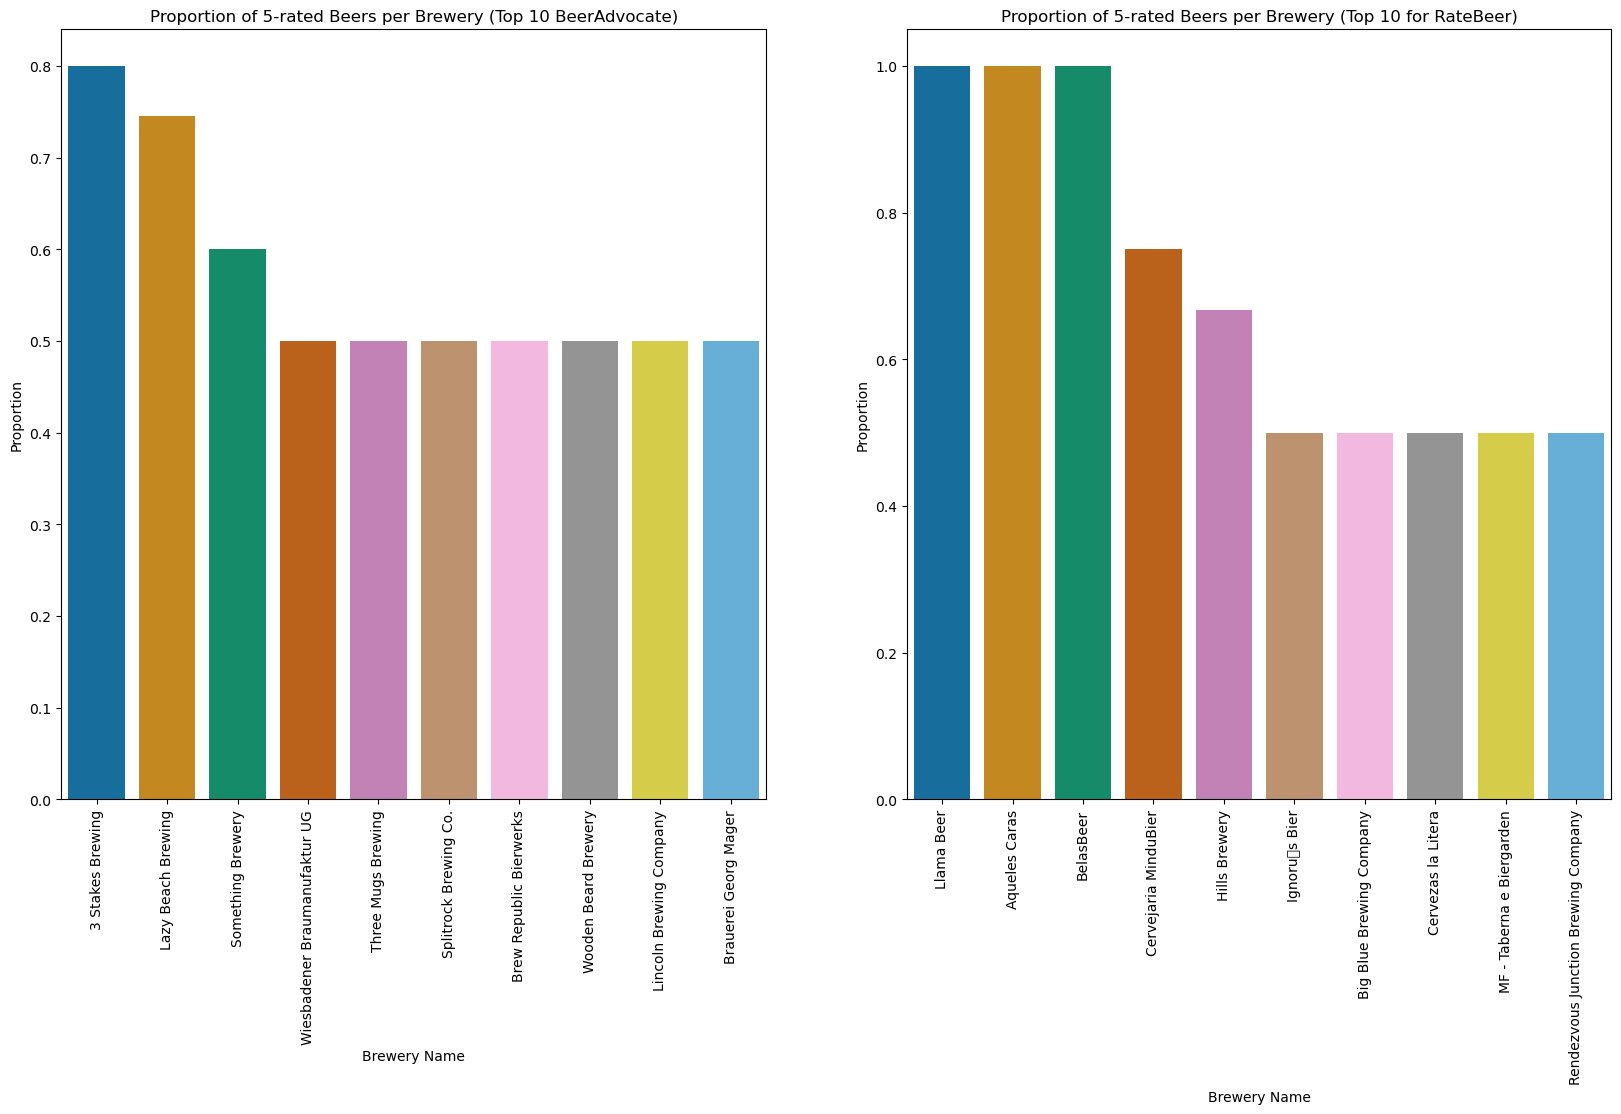

In [15]:
def top_10_proportion(breweries_df, beer_score_5):
    # Create dataframe for breweries with 5 rated beers
    breweries_5 = breweries_df[breweries_df['id'].isin(beer_score_5['brewery_id'])]
    breweries_5.rename(columns={'name': 'brewery_name'}, inplace=True)

    # Isolate brewery infos 
    brewery_counts_all = beer_score_5['brewery_name'].value_counts()
    brewery_count_df = pd.DataFrame({'brewery_name': brewery_counts_all.index, 'count': brewery_counts_all.values})

    # Determining the proportion of 5 rated beers
    # Merge DataFrames on the 'brewery_name' column
    proportion_of_5_df = pd.merge(breweries_5, brewery_count_df, on='brewery_name', how='inner')

    # Exclude breweries with less than 2 beers to get meaningful proportions
    proportion_of_5_df = proportion_of_5_df[proportion_of_5_df['nbr_beers'] >= 2]

    # Perform division
    proportion_of_5_df['proportion'] = proportion_of_5_df['count'] / proportion_of_5_df['nbr_beers']

    # Taking Top 10 breweries
    Top_10_breweries = proportion_of_5_df.sort_values('proportion', ascending=False).head(10)
    
    return Top_10_breweries

Top_10_breweries_BA = top_10_proportion(breweries_BA, beer_score_5_BA)
Top_10_breweries_RB = top_10_proportion(breweries_RB, beer_score_5_RB)

# Create a histogram of the top 10 breweries with the most 5 rated beers ordered by proportion
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='brewery_name', y='proportion', data=Top_10_breweries_BA, palette=sns.color_palette("colorblind"))
plt.title('Proportion of 5-rated Beers per Brewery (Top 10 BeerAdvocate)')
plt.xlabel('Brewery Name')
plt.xticks(rotation=90)
plt.ylabel('Proportion')

plt.subplot(1, 2, 2)
sns.barplot(x='brewery_name', y='proportion', data=Top_10_breweries_RB, palette=sns.color_palette("colorblind"))
plt.title('Proportion of 5-rated Beers per Brewery (Top 10 for RateBeer)')
plt.xlabel('Brewery Name')
plt.xticks(rotation=90)
plt.ylabel('Proportion')

plt.show()

<Figure size 2000x500 with 0 Axes>

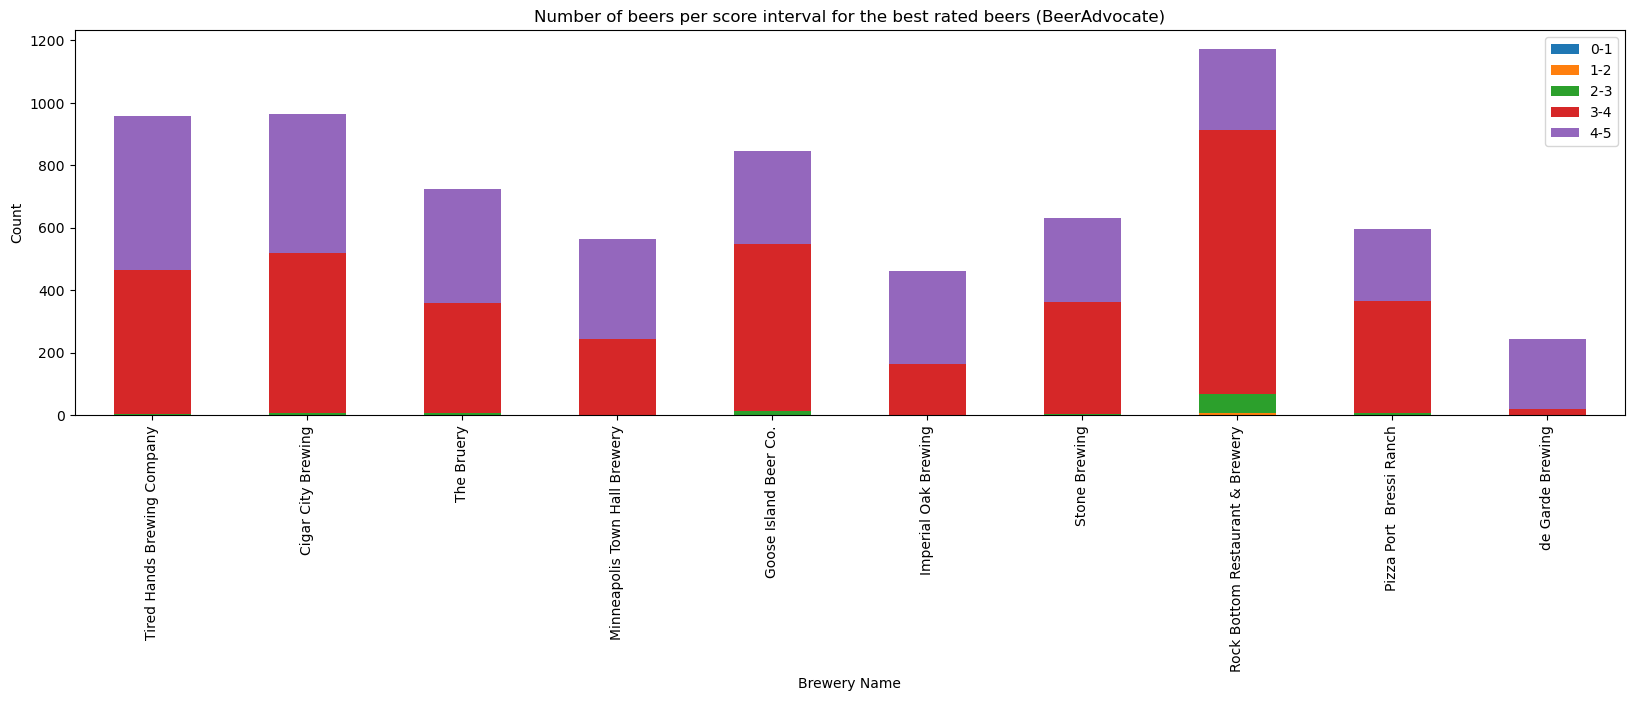

<Figure size 2000x500 with 0 Axes>

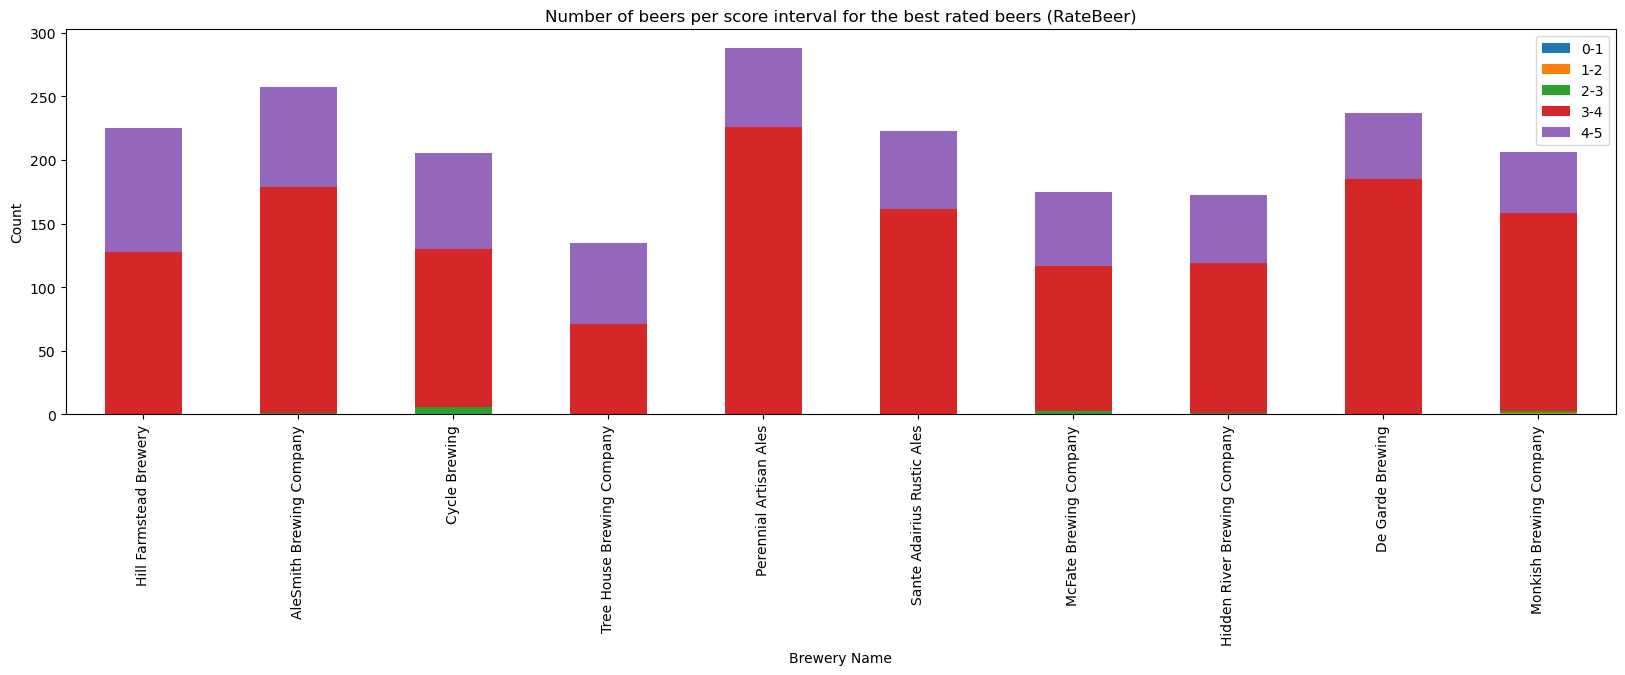

In [16]:
# Count the number of beers per rating interval
def count_beers_per_rating_interval(beers_df):
    beers_score =[]
    brewery_counts = []
    for i in range(5):
        beers_score.append(beers_df[(i < beers_df['avg_computed']) & (beers_df['avg_computed'] <= i+1)])
        brewery_counts.append(beers_score[i]['brewery_name'].value_counts().sort_index())
    return brewery_counts

breweries_rating_counts_BA = count_beers_per_rating_interval(beers_BA)
breweries_rating_counts_RB = count_beers_per_rating_interval(beers_RB)

# Dataframe with the number of beers per rating interval matched with the brewery name
# Create a dataframe with the different lists in breweries_rating_counts_BA as columns matching in the brewery name for the rows
def breweries_rating_counts(beers_df):
    breweries_rating_counts = pd.concat(count_beers_per_rating_interval(beers_df), axis=1, keys=['0-1', '1-2', '2-3', '3-4', '4-5'])
    breweries_rating_counts.index.name = 'Brewery Name'
    breweries_rating_counts.fillna(0, inplace=True)
    breweries_rating_counts = breweries_rating_counts.astype(int)
    return breweries_rating_counts

df_breweries_rating_counts_BA = breweries_rating_counts(beers_BA)
df_breweries_rating_counts_RB = breweries_rating_counts(beers_RB)

# Create a stacked barplot for the number of beers per rating interval for BeerAdvocate
plt.figure(figsize=(20, 5))
df_breweries_rating_counts_BA.sort_values(by='4-5', ascending=False).iloc[:10].plot.bar(stacked=True, figsize=(20, 5), rot=90)
plt.title('Number of beers per score interval for the best rated beers (BeerAdvocate)')
plt.xlabel('Brewery Name')
plt.ylabel('Count')
plt.show()

# Create a stacked barplot for the number of beers per rating interval for RateBeer
plt.figure(figsize=(20, 5))
df_breweries_rating_counts_RB.sort_values(by='4-5', ascending=False).iloc[:10].plot.bar(stacked=True, figsize=(20, 5), rot=90)
plt.title('Number of beers per score interval for the best rated beers (RateBeer)')
plt.xlabel('Brewery Name')
plt.ylabel('Count')
plt.show()

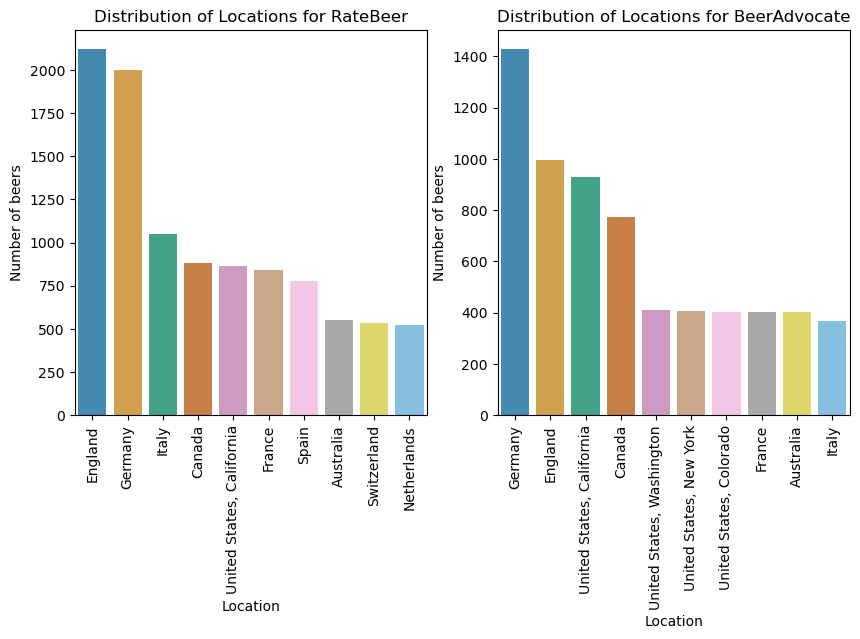

In [17]:
# Count the number of beers for each location
def count_Top_10(breweries_df):
    number_of_beer_per_country = breweries_df['location'].value_counts()
    top_10_breweries_location = number_of_beer_per_country.nlargest(10)
    return top_10_breweries_location, number_of_beer_per_country

top_10_breweries_location_RB, _ = count_Top_10(breweries_RB)
top_10_breweries_location_BA, _ = count_Top_10(breweries_BA)

_ , number_of_beer_per_country_RB = count_Top_10(breweries_RB)
_ , number_of_beer_per_country_BA = count_Top_10(breweries_BA)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=top_10_breweries_location_RB.index, y=top_10_breweries_location_RB.values, alpha=0.8, palette=sns.color_palette("colorblind"))
plt.title('Distribution of Locations for RateBeer')
plt.ylabel('Number of beers')
plt.xlabel('Location')
plt.xticks(rotation=90) 

plt.subplot(1, 2, 2)
sns.barplot(x=top_10_breweries_location_BA.index, y=top_10_breweries_location_BA.values, alpha=0.8, palette=sns.color_palette("colorblind"))
plt.title('Distribution of Locations for BeerAdvocate')
plt.ylabel('Number of beers')
plt.xlabel('Location')
plt.xticks(rotation=90) 
plt.show()

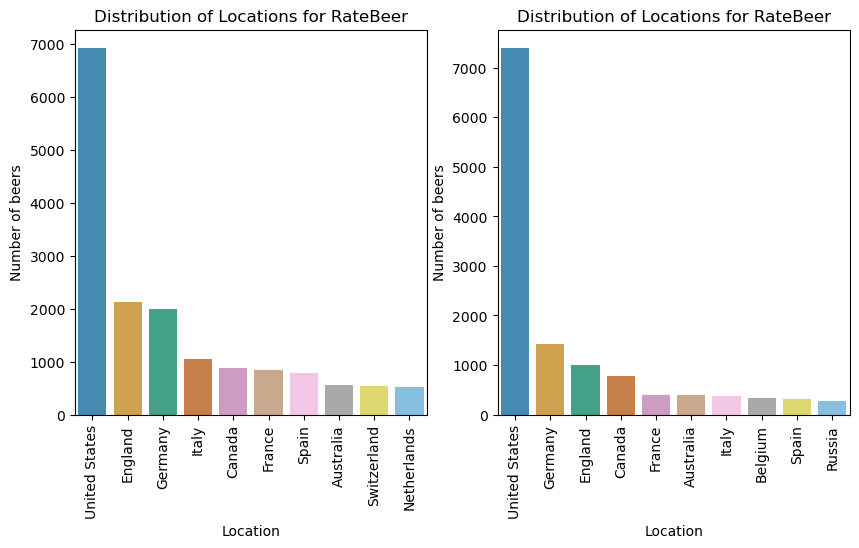

In [18]:
def filtering_us(breweries_df, number_of_beer_per_country):
    # Create a category that gathers all the US beers in one location
    # Count number of beers in the US
    nb_us_beers = breweries_df[breweries_df['location'].str.startswith('United States,')].value_counts().sum()

    # Modify world wide beer count to gather all the US beers in one category 
    us_filtered = number_of_beer_per_country[~number_of_beer_per_country.index.str.startswith('United States,')]
    us_filtered.loc['United States'] = nb_us_beers

    us_filtered = us_filtered.nlargest(10)
    return us_filtered

us_filtered_RB = filtering_us(breweries_RB, number_of_beer_per_country_RB)
us_filtered_BA = filtering_us(breweries_BA, number_of_beer_per_country_BA)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=us_filtered_RB.index, y=us_filtered_RB.values, alpha=0.8, palette=sns.color_palette("colorblind"))
plt.title('Distribution of Locations for RateBeer')
plt.ylabel('Number of beers')
plt.xlabel('Location')
plt.xticks(rotation=90) 

plt.subplot(1, 2, 2)
sns.barplot(x=us_filtered_BA.index, y=us_filtered_BA.values, alpha=0.8, palette=sns.color_palette("colorblind"))
plt.title('Distribution of Locations for RateBeer')
plt.ylabel('Number of beers')
plt.xlabel('Location')
plt.xticks(rotation=90) 
plt.show()

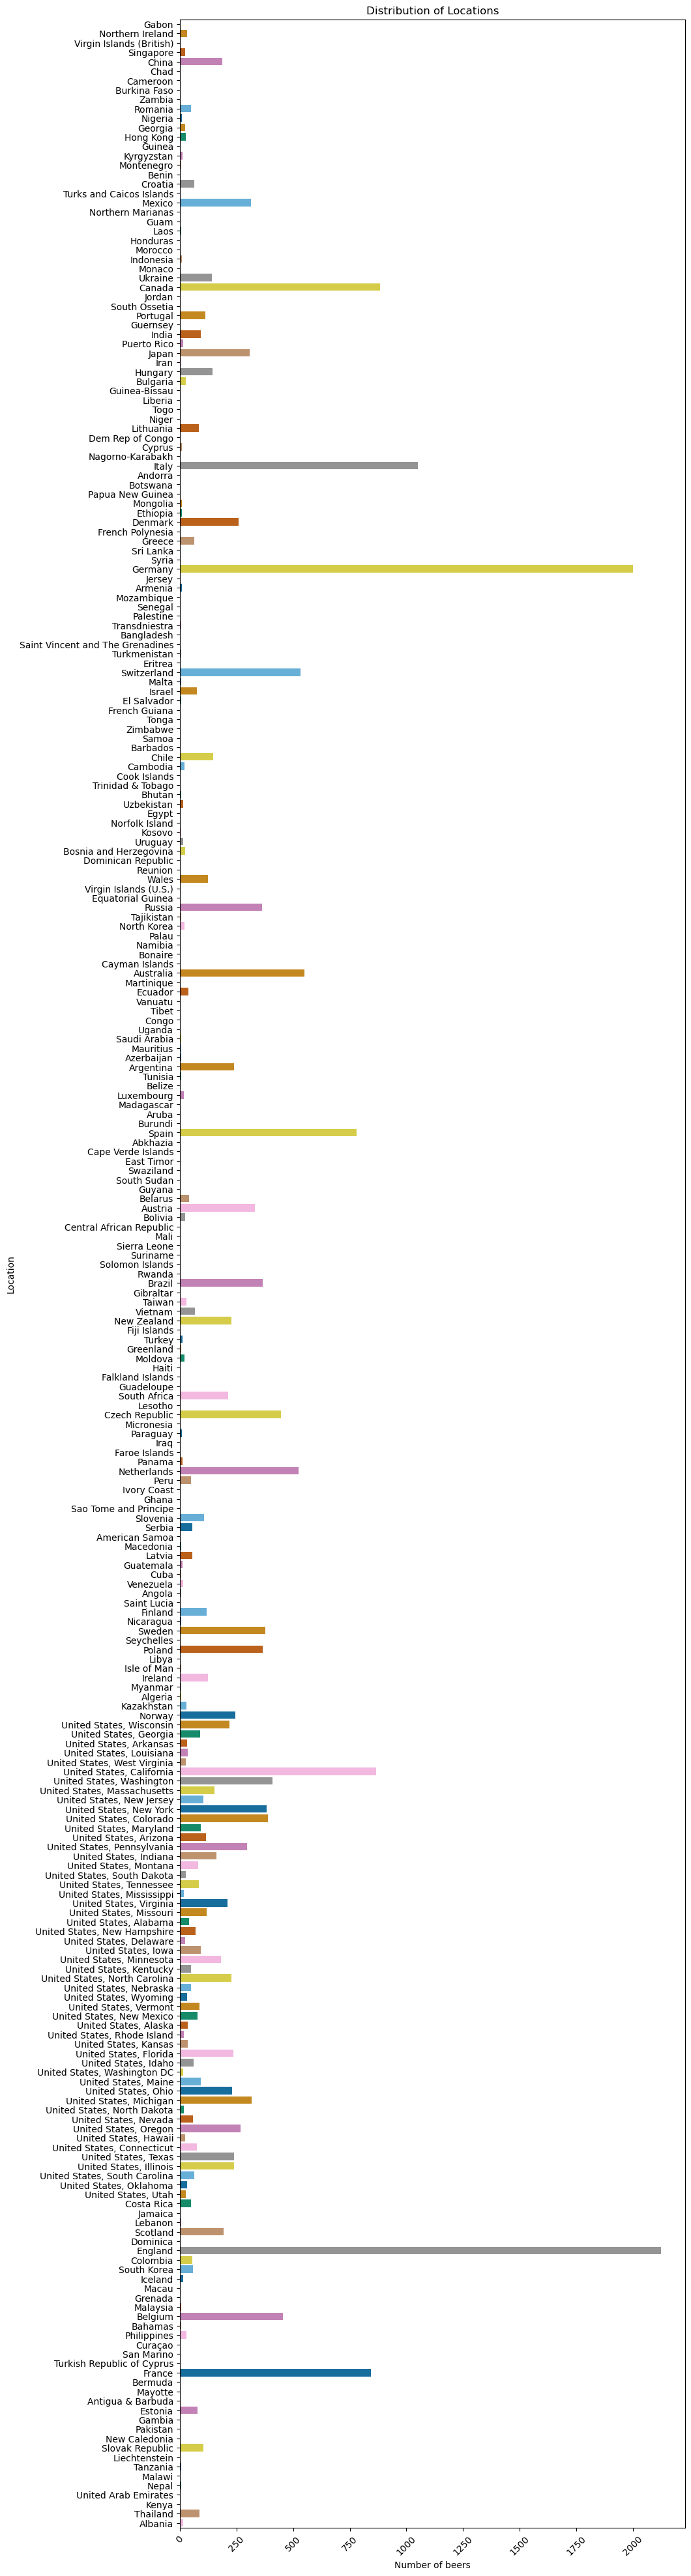

In [19]:
# Plot the entire distribution of locations

plt.figure(figsize=(10, 50))
sns.countplot(y='location', data=breweries_RB, palette=sns.color_palette("colorblind"))
plt.title('Distribution of Locations')
plt.xlabel('Number of beers')
plt.ylabel('Location')
plt.xticks(rotation=45) 
plt.show()

# TOP COUNTRY

## Feasibility check of project's methods
- give their essential mathematical details in the notebook.

In [20]:
# todo

## Alternatives considered
- analysis and communication is reasonable

In [21]:
# todo